# Imports & Configs

In [1]:
# %pip install numpy pandas seaborn matplotlib optuna sklearn xgboost catboost lightgbm > /dev/null 2>&1

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings
import optuna
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE, SelectFromModel
import itertools
#from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from tabulate import tabulate
import os
import glob
from tqdm import tqdm
warnings.filterwarnings('ignore')
optuna.logging.set_verbosity(optuna.logging.WARNING)

In [3]:
# folder_path = 'C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\'

In [4]:
# file_paths = glob.glob(folder_path + '/*.csv')

In [5]:
# train = pd.DataFrame()

In [6]:
# n_file_limit = 1
# for file_path in tqdm(file_paths, desc='Processing files', unit='file'):
#     if n_file_limit <= 0: break
#     n_file_limit -= 1
#     df = pd.read_csv(file_path)
#     train = pd.concat([train, df], ignore_index=True)

# Data Preprocessing & EDA

In [7]:
train = pd.read_csv("C:\\Users\\thsak\\Desktop\\IDS\\CICIoT2023\\part-00113-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv")
train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,102.20,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315011e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334862e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308927e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SYN_Flood
3,3.394034,210.60,6.00,64.00,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336215e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.00,6.00,64.00,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334381e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,64.00,8775.835347,8775.835347,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310664e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
451494,4.749410,108.00,6.00,64.00,0.421105,0.421105,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295157e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DoS-TCP_Flood
451495,0.006198,2.96,1.04,72.91,5.956262,5.956262,0.0,0.0,0.0,0.0,...,0.401681,42.5,8.314935e+07,9.5,9.179101,0.57063,3.258608,0.05,141.55,DDoS-ICMP_Flood
451496,0.086669,38225.00,17.00,64.00,8818.813708,8818.813708,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310246e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451498 entries, 0 to 451497
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    451498 non-null  float64
 1   Header_Length    451498 non-null  float64
 2   Protocol Type    451498 non-null  float64
 3   Duration         451498 non-null  float64
 4   Rate             451498 non-null  float64
 5   Srate            451498 non-null  float64
 6   Drate            451498 non-null  float64
 7   fin_flag_number  451498 non-null  float64
 8   syn_flag_number  451498 non-null  float64
 9   rst_flag_number  451498 non-null  float64
 10  psh_flag_number  451498 non-null  float64
 11  ack_flag_number  451498 non-null  float64
 12  ece_flag_number  451498 non-null  float64
 13  cwr_flag_number  451498 non-null  float64
 14  ack_count        451498 non-null  float64
 15  syn_count        451498 non-null  float64
 16  fin_count        451498 non-null  floa

In [9]:
train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,102.2,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315011e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334862e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood
2,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,54.0,8.308927e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-SYN_Flood
3,3.394034,210.6,6.0,64.0,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336215e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.0,6.0,64.0,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334381e+07,9.5,10.392305,0.0,0.0,0.0,141.55,DDoS-RSTFINFlood


In [10]:
train.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,451498.000000,4.514980e+05,451498.000000,451498.000000,4.514980e+05,4.514980e+05,451498.000000,451498.000000,451498.000000,451498.000000,...,451498.000000,451498.000000,451498.000000,4.514980e+05,451498.000000,451498.000000,451498.000000,4.514980e+05,451498.000000,451498.000000
mean,5.715186,7.704312e+04,9.072565,66.337599,9.467058e+03,9.467058e+03,0.000004,0.086344,0.206459,0.090277,...,124.876302,33.381340,124.983505,8.321214e+07,9.499878,13.132842,47.174271,3.085566e+04,0.096250,141.548302
std,260.774301,4.635026e+05,8.966066,13.931429,1.033561e+05,1.033561e+05,0.001329,0.280871,0.404764,0.286579,...,240.858298,160.906349,241.765667,1.704557e+07,0.818956,8.635086,227.590850,3.226507e+05,0.232888,21.063844
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,42.000000,0.000000,42.000000,0.000000e+00,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.091460e+00,2.091460e+00,0.000000,0.000000,0.000000,0.000000,...,50.000000,0.000000,50.000000,8.307157e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.571264e+01,1.571264e+01,0.000000,0.000000,0.000000,0.000000,...,54.000000,0.000000,54.000000,8.312453e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.105739,2.877100e+02,14.440000,64.000000,1.184370e+02,1.184370e+02,0.000000,0.000000,0.000000,0.000000,...,54.050113,0.366319,54.060000,8.334400e+07,9.500000,10.396725,0.505921,1.313486e+00,0.080000,141.550000
max,64016.004351,9.785469e+06,47.000000,255.000000,7.340032e+06,7.340032e+06,0.871689,1.000000,1.000000,1.000000,...,8201.774853,7139.980170,8754.000000,1.676394e+08,15.000000,128.078251,10120.787946,5.132515e+07,1.000000,244.600000


In [11]:
train.describe(include='object')

,label
count,451498
unique,34
top,DDoS-ICMP_Flood
freq,69891


## Missing Data

In [12]:
total = train.shape[0]
missing_columns = [col for col in train.columns if train[col].isnull().sum() > 0]
for col in missing_columns:
    null_count = train[col].isnull().sum()
    per = (null_count/total) * 100
    print(f"{col}: {null_count} ({round(per, 3)}%)")

In [13]:
#Drop rown with NaN values
train = train.dropna()

# To reset the indices
train = train.reset_index(drop=True)

# Print the dataframe
train

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.00,1.00,102.20,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.315011e+07,9.5,9.165151,0.00000,0.000000,0.00,141.55,DDoS-ICMP_Flood
1,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334862e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
2,0.000000,54.00,6.00,64.00,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.308927e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SYN_Flood
3,3.394034,210.60,6.00,64.00,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.000000,54.0,8.336215e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
4,0.000000,54.00,6.00,64.00,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.000000,54.0,8.334381e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DDoS-RSTFINFlood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,64.00,8775.835347,8775.835347,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310664e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood
451494,4.749410,108.00,6.00,64.00,0.421105,0.421105,0.0,0.0,0.0,0.0,...,0.000000,54.0,8.295157e+07,9.5,10.392305,0.00000,0.000000,0.00,141.55,DoS-TCP_Flood
451495,0.006198,2.96,1.04,72.91,5.956262,5.956262,0.0,0.0,0.0,0.0,...,0.401681,42.5,8.314935e+07,9.5,9.179101,0.57063,3.258608,0.05,141.55,DDoS-ICMP_Flood
451496,0.086669,38225.00,17.00,64.00,8818.813708,8818.813708,0.0,0.0,0.0,0.0,...,0.000000,50.0,8.310246e+07,9.5,10.000000,0.00000,0.000000,0.00,141.55,DDoS-UDP_Flood


No missing values

## Duplicates

In [14]:
train.drop_duplicates()
print(f"Number of duplicate rows: {train.duplicated().sum()}")

Number of duplicate rows: 0


## Outliers

In [15]:
# for col in df:
#     if col != 'class' and is_numeric_dtype(df[col]):
#         fig, ax = plt.subplots(2, 1, figsize=(12, 8))
#         g1 = sns.boxplot(x = df[col], ax=ax[0])
#         g2 = sns.scatterplot(data=df, x=df[col],y=df['class'], ax=ax[1])
#         plt.show()

No outliers

In [16]:
# plt.figure(figsize=(40,30))
# sns.heatmap(train.corr(), annot=True)

# import plotly.express as px
# fig = px.imshow(df.corr(), text_auto=True, aspect="auto")
# fig.show()

<Axes: xlabel='count', ylabel='label'>

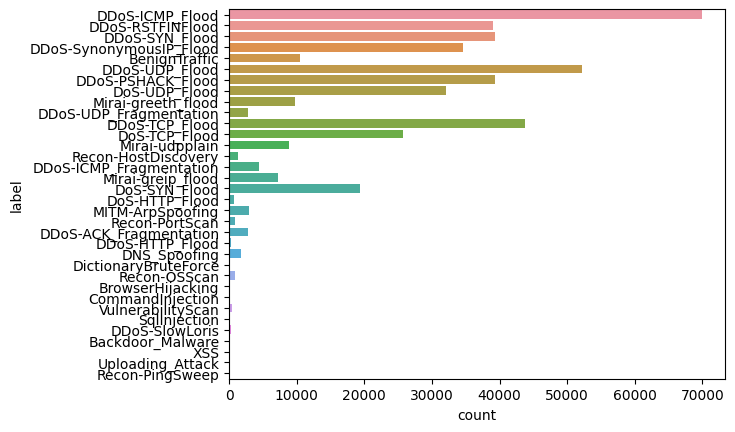

In [17]:
sns.countplot(y=train['label'])

# Classification: 34 (33+1) classes

In [18]:
labels = ['DDoS-RSTFINFlood',
'DDoS-PSHACK_Flood',
'DDoS-SYN_Flood',
'DDoS-UDP_Flood',
'DDoS-TCP_Flood',
'DDoS-ICMP_Flood',
'DDoS-SynonymousIP_Flood',
'DDoS-ACK_Fragmentation',
'DDoS-UDP_Fragmentation',
'DDoS-ICMP_Fragmentation',
'DDoS-SlowLoris',
'DDoS-HTTP_Flood',
'DoS-UDP_Flood',
'DoS-SYN_Flood',
'DoS-TCP_Flood',
'DoS-HTTP_Flood',
'Mirai-greeth_flood',
'Mirai-greip_flood',
'Mirai-udpplain',
'Recon-PingSweep',
'Recon-OSScan',
'Recon-PortScan',
'VulnerabilityScan',
'Recon-HostDiscovery',
'DNS_Spoofing',
'MITM-ArpSpoofing',
'BenignTraffic',
'BrowserHijacking',
'Backdoor_Malware',
'XSS',
'Uploading_Attack',
'SqlInjection',
'CommandInjection',
'DictionaryBruteForce']

# Label Encoding

In [19]:
def le(df):
    for col in df.columns:
        if df[col].dtype == 'object':
                label_encoder = LabelEncoder()
                df[col] = label_encoder.fit_transform(df[col])

le(train)
# le(test)

In [20]:
# train.drop(['num_outbound_cmds'], axis=1, inplace=True)
# test.drop(['num_outbound_cmds'], axis=1, inplace=True)
train.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,102.2,204.980158,204.980158,0.0,0.0,0.0,0.0,...,0.0,42.0,8.315011e+07,9.5,9.165151,0.0,0.0,0.0,141.55,6
1,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334862e+07,9.5,10.392305,0.0,0.0,0.0,141.55,9
2,0.000000,54.0,6.0,64.0,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,54.0,8.308927e+07,9.5,10.392305,0.0,0.0,0.0,141.55,10
3,3.394034,210.6,6.0,64.0,1.144677,1.144677,0.0,0.0,1.0,0.0,...,0.0,54.0,8.336215e+07,9.5,10.392305,0.0,0.0,0.0,141.55,12
4,0.000000,54.0,6.0,64.0,0.992022,0.992022,0.0,1.0,0.0,1.0,...,0.0,54.0,8.334381e+07,9.5,10.392305,0.0,0.0,0.0,141.55,9


# Feature selection

In [21]:
X_train = train.drop(['label'], axis=1)
Y_train = train['label']

In [22]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
# sel.fit(X_train, Y_train)

# with progress bar
with tqdm(total=len(X_train)) as pbar:
    sel.fit(X_train, Y_train)
    pbar.update(len(X_train))
selected_features = X_train.columns[(sel.get_support())]

selected_features

  0%|          | 0/451498 [00:00<?, ?it/s]

100%|██████████| 451498/451498 [18:34<00:00, 405.03it/s]


Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Srate',
       'fin_flag_number', 'syn_flag_number', 'psh_flag_number', 'ack_count',
       'syn_count', 'fin_count', 'urg_count', 'rst_count', 'Tot sum', 'Min',
       'Max', 'AVG', 'Tot size', 'IAT', 'Magnitue'],
      dtype='object')

In [23]:
X_train = X_train[selected_features]

In [24]:
X_train

,flow_duration,Header_Length,Protocol Type,Srate,fin_flag_number,syn_flag_number,psh_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,Tot sum,Min,Max,AVG,Tot size,IAT,Magnitue
0,0.000000,0.00,1.00,204.980158,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,441.00,42.0,42.0,42.000000,42.0,8.315011e+07,9.165151
1,0.000000,54.00,6.00,0.000000,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.00,567.00,54.0,54.0,54.000000,54.0,8.334862e+07,10.392305
2,0.000000,54.00,6.00,0.000000,0.0,1.0,0.0,0.0,1.00,0.0,0.0,0.00,567.00,54.0,54.0,54.000000,54.0,8.308927e+07,10.392305
3,3.394034,210.60,6.00,1.144677,0.0,1.0,0.0,0.0,3.90,0.0,0.0,0.00,567.00,54.0,54.0,54.000000,54.0,8.336215e+07,10.392305
4,0.000000,54.00,6.00,0.992022,1.0,0.0,0.0,1.0,0.00,1.0,0.0,0.00,567.00,54.0,54.0,54.000000,54.0,8.334381e+07,10.392305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451493,0.137860,40275.00,17.00,8775.835347,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,525.00,50.0,50.0,50.000000,50.0,8.310664e+07,10.000000
451494,4.749410,108.00,6.00,0.421105,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,567.00,54.0,54.0,54.000000,54.0,8.295157e+07,10.392305
451495,0.006198,2.96,1.04,5.956262,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.02,443.32,42.0,43.6,42.128505,42.5,8.314935e+07,9.179101
451496,0.086669,38225.00,17.00,8818.813708,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,525.00,50.0,50.0,50.000000,50.0,8.310246e+07,10.000000


In [25]:
Y_train

0          6
1          9
2         10
3         12
4          9
          ..
451493    14
451494    20
451495     6
451496    14
451497    19
Name: label, Length: 451498, dtype: int32

# Split and scale data

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)

In [27]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)

# # with progress bar
# with tqdm(total=len(X_train)) as pbar:
#     X_train = scale.fit_transform(X_train)
#     pbar.update(len(X_train))


x_test = scale.transform(x_test)

In [28]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(316048, 19)
(316048,)
(135450, 19)
(135450,)


In [29]:
x_train = np.expand_dims(x_train, -1)
y_train = np.expand_dims(y_train, -1)
print(np.shape(x_train))
print(np.shape(y_train))

(316048, 19, 1)
(316048, 1)


# LSTM

In [30]:
import tensorflow as tf
from tensorflow import keras

model =  keras.models.Sequential()
model.add(tf.keras.layers.LSTM(120, activation="tanh", return_sequences=True,  input_shape=(None, 1)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.LSTM(80, activation="tanh", return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.25))
model.add(tf.keras.layers.LSTM(60, activation="tanh", return_sequences=True))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.15))
model.add(tf.keras.layers.LSTM(34, activation="sigmoid"))
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 120)         58560     
                                                                 
 batch_normalization (Batch  (None, None, 120)         480       
 Normalization)                                                  
                                                                 
 dropout (Dropout)           (None, None, 120)         0         
                                                                 
 lstm_1 (LSTM)               (None, None, 80)          64320     
                                                                 
 batch_normalization_1 (Bat  (None, None, 80)          320       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, None, 80)          0

In [39]:
history1= model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=1000, epochs=100)

Epoch 1/100
317/317 [==============================] - 259s 817ms/step - loss: 0.3667 - accuracy: 0.8432 - val_loss: 0.3154 - val_accuracy: 0.8753
Epoch 2/100
317/317 [==============================] - 170s 536ms/step - loss: 0.3435 - accuracy: 0.8518 - val_loss: 0.3356 - val_accuracy: 0.8395
Epoch 3/100
317/317 [==============================] - 186s 587ms/step - loss: 0.3052 - accuracy: 0.8680 - val_loss: 0.2430 - val_accuracy: 0.9132
Epoch 4/100
317/317 [==============================] - 188s 595ms/step - loss: 0.2685 - accuracy: 0.8877 - val_loss: 0.2825 - val_accuracy: 0.8954
Epoch 5/100
317/317 [==============================] - 285s 901ms/step - loss: 0.2085 - accuracy: 0.9174 - val_loss: 1.0450 - val_accuracy: 0.7461
Epoch 6/100
317/317 [==============================] - 298s 940ms/step - loss: 0.1710 - accuracy: 0.9337 - val_loss: 0.4168 - val_accuracy: 0.8654
Epoch 7/100
317/317 [==============================] - 311s 981ms/step - loss: 0.1747 - accuracy: 0.9317 - val_loss: 0

In [40]:
model.evaluate(x=x_test, y=y_test, batch_size=8)

16932/16932 [==============================] - 114s 7ms/step - loss: 0.0622 - accuracy: 0.9807


[0.062159352004528046, 0.980686604976654]

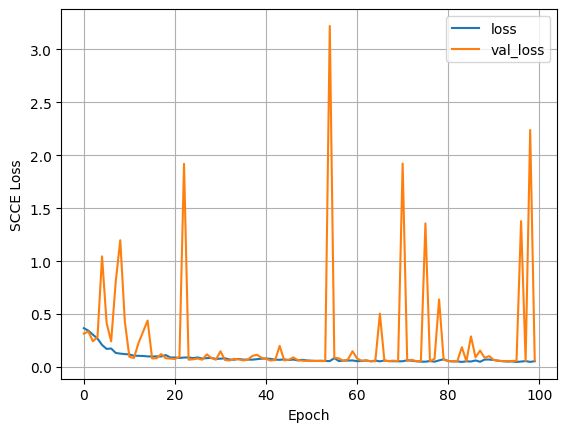

In [41]:
plt.plot(history1.history['loss'], label='loss')
plt.plot(history1.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)

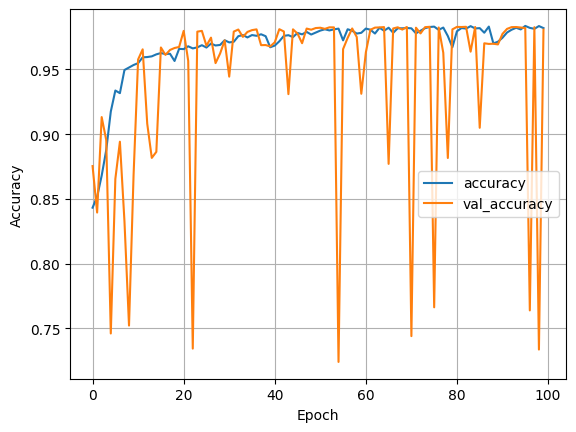

In [42]:
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True) 

## Training Curve

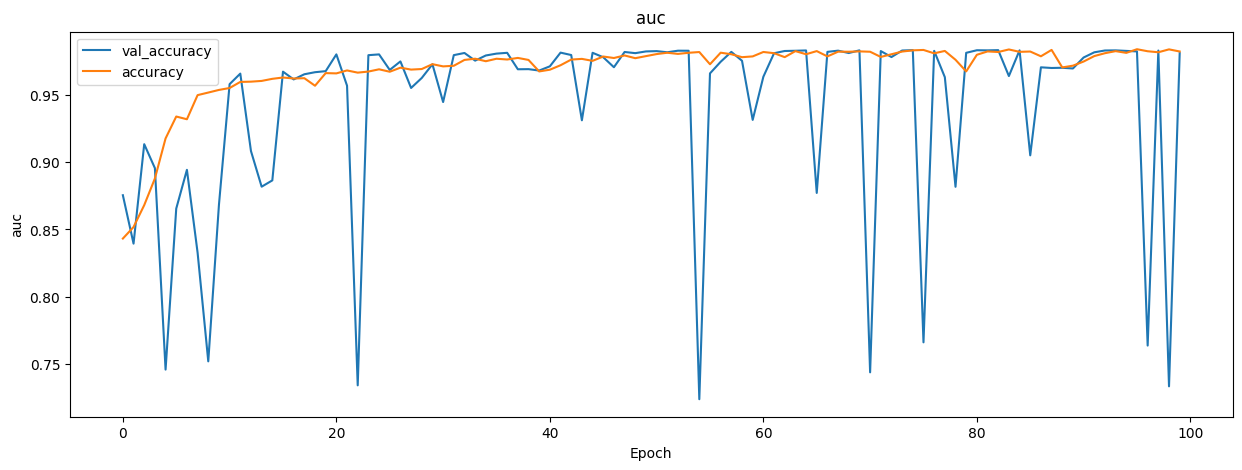

In [43]:
plt.figure(figsize=(15,5))
plt.plot(range(history1.epoch[-1]+1),history1.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history1.epoch[-1]+1),history1.history['accuracy'],label='accuracy')
plt.title('auc'); plt.xlabel('Epoch'); plt.ylabel('auc');plt.legend();
plt.show()

## Generate ROC Curve

### New Section

In [44]:
y_pred = model.predict(x_test)

print(y_pred.shape)
for i in range (33):
    y_pred=np.delete(y_pred,0,1)
print(y_pred.shape)
y_pred=np.squeeze(y_pred,1)
print(y_pred.shape)

4233/4233 [==============================] - 49s 12ms/step
(135450, 34)
(135450, 1)
(135450,)


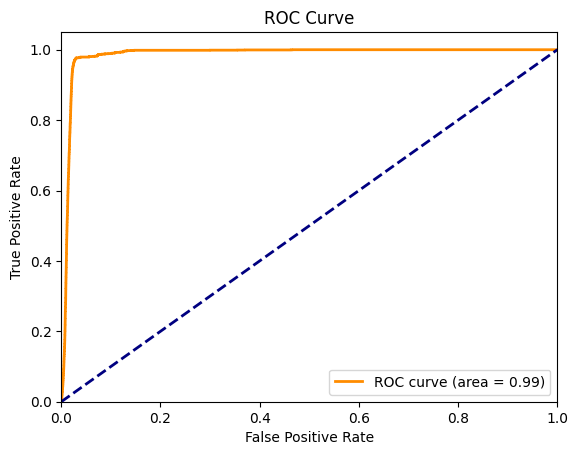

In [45]:
from sklearn.metrics import roc_curve, auc

def generate_results(y_test, y_score):
    # print(y_score)
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',
             lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

generate_results(y_test, y_pred)